In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
from pandas import Series,DataFrame
from pyecharts.charts import Geo
from pyecharts.globals import GeoType
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.charts import Pie
import math
import jieba
import jieba.posseg as pseg  # 词性标注
import jieba.analyse as anls  # 关键词提取
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rc('axes', unicode_minus=False)

In [2]:
client = pymongo.MongoClient('121.36.74.141', 27017)
mydb = client['mydb']
python = mydb['Python']

In [3]:
data = DataFrame(list(python.find()))
data = data.dropna(axis=0,how='any')


In [4]:
data

,_id,city,company_industry,company_name,company_size,count,describ,education,name,newtime,salary,worktime
0,5eb914fd20449ae89ad054dc,北京,"互联网,培训/课外教育/教育辅助,计算机软件",北京简单科技有限公司,500-999人,招3人,"[岗位职责：, 1、参与完成中型以上项目设计和开发；, 2、配合团队分工完成设计和开发任务；...",本科,中级后端开发工程师,更新于 4月29日,1万-2万,3-5年
1,5eb914fd20449ae89ad054dd,北京,"互联网,IT服务",北京字节跳动科技有限公司,10000人以上,招10人,"[岗位职责：, 1、参与今日头条主APP/西瓜视频/机器学习平台/ToB等业务信息流、相关性...",硕士,推荐算法实习生（可转正）,更新于 5月5日,6千-9千,经验不限
2,5eb914fd20449ae89ad054de,北京,计算机软件,北京声智科技有限公司,100-299人,招1人,"[要求：, 1.熟练使用python；, 2.熟悉linux，熟练使用shell； , 3....",本科,爬虫实习生,更新于 4月22日,6千-8千,无经验
3,5eb914fd20449ae89ad054df,北京,"计算机软件,互联网,IT服务",北京志翔科技股份有限公司,100-299人,招2人,"[岗位职责：, 完成相关的研发任务和工作，包含以下几个方面：, 1. 系统后台功能模块的设计...",本科,高级软件工程师,更新于 4月26日,2.5万-4万,3-5年
4,5eb914fd20449ae89ad054e0,北京,"计算机软件,IT服务",上海数慧系统技术有限公司,500-999人,招1人,"[岗位职责：, 1.负责大数据平台数据ETL的实现和优化, 2.负责模型算法开发和维护, 3...",本科,大数据开发工程师,更新于 4月30日,8千-1.6万,经验不限
5,5eb914fd20449ae89ad054e1,北京,"互联网,社团/组织/社会保障",北京数城未来科技有限公司,20人以下,招1人,"[主要职责：, , , , ● 负责公司主要公共服务的部署、响应和维护；, , ● ...",本科,DevOps运维开发工程师,更新于 4月28日,1万-1.8万,经验不限
6,5eb914fd20449ae89ad054e2,北京,学术/科研,中国科学院空天信息创新研究院,1000-9999人,招13人,"[专 业：计算机科技与技术、信息与通信工程等相关专业, 学 历：本科及以上, 岗位要求：, ...",本科,软件研发工程师,更新于 3月20日,1万-1.5万,1-3年
7,5eb914fd20449ae89ad054e3,北京,"IT服务,计算机软件,运营商/增值服务,电子/半导体/集成电路",北京四维图新科技股份有限公司,1000-9999人,招1人,"[岗位职责:, 1.根据业务需要，对网站、APP、小程序等进行数据采集, 2. 负责数据采集...",本科,高级信息采集工程师,更新于 2月28日,1万-2万,5-10年
8,5eb914fd20449ae89ad054e4,北京,"证券/期货,卫生服务,房地产开发与经营,零售/批发",泰康健康产业投资控股有限公司,10000人以上,招1人,"[ 1、负责规划并搭建企业内部的RPA系统平台； , 2、与业务部门协作，分析现有的业务流...",本科,健康科技中心---RPA开发工程师岗,更新于 8月19日,1.5万-2.5万,5-10年
9,5eb914fd20449ae89ad054e5,北京,计算机软件,江苏智蓝信息科技有限公司,1000-9999人,招1人,"[岗位职责：, 1.精通oracle体系架构，精通plsql。, 2.精通SQL语言的编写和...",大专,数据库开发工程师,更新于 5月9日,1.5万-2万,3-5年


In [5]:
# 清洗count字段
# 将招聘人数字段转为整型
for i in range(data['count'].count()):
    if data.iloc[i]['count']:
        data.iloc[i]['count'] = int(data.iloc[i]['count'][1:-1])

In [6]:
# 清洗salary字段
# 将薪资字段转为float型
for i in range(data['count'].count()):
    if '以上' in data.iloc[i]['salary'] or '以下' in data.iloc[i]['salary']:
        data.iloc[i]['salary'] = data.iloc[i]['salary'].replace('以上','')
        data.iloc[i]['salary'] = data.iloc[i]['salary'].replace('以下','')
        l = data.iloc[i]['salary']
        if '千' in l:
            data.iloc[i]['salary'] = float(l[:-1]) * 1000
        if '万' in l:
            data.iloc[i]['salary'] = float(l[:-1]) * 10000
    elif data.iloc[i]['salary'] != '面议':  
        l = data.iloc[i]['salary'].split('-')
        if '千' in l[0]:
            x = float(l[0][:-1]) * 1000
        if '万' in l[0]:
            x = float(l[0][:-1]) * 10000
        if '千' in l[1]:
            y = float(l[1][:-1]) * 1000
        if '万' in l[1]:
            y = float(l[1][:-1]) * 10000
        data.iloc[i]['salary'] = round((x + y) / 2, 2)        
dc = {}
for i in data.groupby('city')['salary']:
    s = 0
    count = 0
    for j in i[1]:
        if j != '面议':
            s += j
            count += 1
    a = round(s / count, 2)
    dc[i[0]] = a
for i in range(data['count'].count()):
    if data.iloc[i]['salary'] == '面议':
        data.iloc[i]['salary'] = dc[data.iloc[i]['city']]

In [7]:
data

,_id,city,company_industry,company_name,company_size,count,describ,education,name,newtime,salary,worktime
0,5eb914fd20449ae89ad054dc,北京,"互联网,培训/课外教育/教育辅助,计算机软件",北京简单科技有限公司,500-999人,3,"[岗位职责：, 1、参与完成中型以上项目设计和开发；, 2、配合团队分工完成设计和开发任务；...",本科,中级后端开发工程师,更新于 4月29日,15000,3-5年
1,5eb914fd20449ae89ad054dd,北京,"互联网,IT服务",北京字节跳动科技有限公司,10000人以上,10,"[岗位职责：, 1、参与今日头条主APP/西瓜视频/机器学习平台/ToB等业务信息流、相关性...",硕士,推荐算法实习生（可转正）,更新于 5月5日,7500,经验不限
2,5eb914fd20449ae89ad054de,北京,计算机软件,北京声智科技有限公司,100-299人,1,"[要求：, 1.熟练使用python；, 2.熟悉linux，熟练使用shell； , 3....",本科,爬虫实习生,更新于 4月22日,7000,无经验
3,5eb914fd20449ae89ad054df,北京,"计算机软件,互联网,IT服务",北京志翔科技股份有限公司,100-299人,2,"[岗位职责：, 完成相关的研发任务和工作，包含以下几个方面：, 1. 系统后台功能模块的设计...",本科,高级软件工程师,更新于 4月26日,32500,3-5年
4,5eb914fd20449ae89ad054e0,北京,"计算机软件,IT服务",上海数慧系统技术有限公司,500-999人,1,"[岗位职责：, 1.负责大数据平台数据ETL的实现和优化, 2.负责模型算法开发和维护, 3...",本科,大数据开发工程师,更新于 4月30日,12000,经验不限
5,5eb914fd20449ae89ad054e1,北京,"互联网,社团/组织/社会保障",北京数城未来科技有限公司,20人以下,1,"[主要职责：, , , , ● 负责公司主要公共服务的部署、响应和维护；, , ● ...",本科,DevOps运维开发工程师,更新于 4月28日,14000,经验不限
6,5eb914fd20449ae89ad054e2,北京,学术/科研,中国科学院空天信息创新研究院,1000-9999人,13,"[专 业：计算机科技与技术、信息与通信工程等相关专业, 学 历：本科及以上, 岗位要求：, ...",本科,软件研发工程师,更新于 3月20日,12500,1-3年
7,5eb914fd20449ae89ad054e3,北京,"IT服务,计算机软件,运营商/增值服务,电子/半导体/集成电路",北京四维图新科技股份有限公司,1000-9999人,1,"[岗位职责:, 1.根据业务需要，对网站、APP、小程序等进行数据采集, 2. 负责数据采集...",本科,高级信息采集工程师,更新于 2月28日,15000,5-10年
8,5eb914fd20449ae89ad054e4,北京,"证券/期货,卫生服务,房地产开发与经营,零售/批发",泰康健康产业投资控股有限公司,10000人以上,1,"[ 1、负责规划并搭建企业内部的RPA系统平台； , 2、与业务部门协作，分析现有的业务流...",本科,健康科技中心---RPA开发工程师岗,更新于 8月19日,20000,5-10年
9,5eb914fd20449ae89ad054e5,北京,计算机软件,江苏智蓝信息科技有限公司,1000-9999人,1,"[岗位职责：, 1.精通oracle体系架构，精通plsql。, 2.精通SQL语言的编写和...",大专,数据库开发工程师,更新于 5月9日,17500,3-5年


In [8]:
# 不同城市平均薪资
regions = []
values = []
for kc,vc in dc.items():
    regions.append(kc)
    values.append(vc)
g = (Geo()
        .add_schema(maptype="china")
        .add("城市-平均薪资图", zip(regions, values), type_ = GeoType.EFFECT_SCATTER)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True, min_=0, max_=20000))
        .render('city_salary.html')
    )

In [9]:
# 不同城市岗位数量
p1 = data.groupby('city')['count'].sum()
dt = dict(p1)
regions = []
values = []
for kc,vc in dt.items():
    regions.append(kc)
    values.append(int(vc))
geo = (Geo()
        .add_schema(maptype="china")
        .add("城市-岗位数量图", zip(regions, values), type_ = GeoType.EFFECT_SCATTER)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True, min_=0, max_=4000))
        .render('city_count.html')
    )

In [10]:
p1

city
上海      3183
乌鲁木齐      74
兰州        57
北京      3727
南京      2270
南宁        18
南昌        56
合肥       372
呼和浩特      50
哈尔滨       77
天津       552
太原       108
广州      1060
成都      1099
昆明        83
杭州      1270
武汉      1735
沈阳       240
济南       584
海口        20
深圳      2904
石家庄      146
福州       302
西宁         1
西安      2070
贵阳       139
郑州       520
重庆       289
银川        22
长春      1193
长沙      1439
Name: count, dtype: int64

In [11]:
# 工作经验对薪资的影响
# 不同工作经验平均薪资情况
dw = {}
for i in data.groupby('worktime')['salary']:
    s = 0
    for j in i[1]:
        s += j 
    a = round(s / len(i[1]), 2)
    dw[i[0]] = a
k_ = []
v_ = []
for k,v in dw.items():
    k_.append(k)
    v_.append(v)
print(k_ ,v_)
bar_2 = Bar()
bar_2.set_colors('#3c3c3c')
bar_2.add_xaxis(k_)
bar_2.add_yaxis(yaxis_data=v_, series_name='平均薪资')
bar_2.render('worktime_salary.html')

['1-3年', '10年以上', '1年以下', '3-5年', '5-10年', '无经验', '经验不限'] [13224.59, 30500.0, 8494.56, 17355.13, 22541.26, 8957.53, 13321.54]


'E:\\文档\\笔记\\anaconda\\worktime_salary.html'

In [12]:
# 学历对薪资的影响
# 不同学历平均薪资情况
de = {}
for i in data.groupby('education')['salary']:
    s = 0
    for j in i[1]:
        s += j 
    a = round(s / len(i[1]), 2)
    de[i[0]] = a
ke_ = []
ve_ = []
for ke,ve in de.items():
    ke_.append(ke)
    ve_.append(ve)
print(ke_ ,ve_)
bar_2 = Bar()
bar_2.set_colors('#3c3c3c')
bar_2.add_xaxis(ke_)
bar_2.add_yaxis(yaxis_data=ve_, series_name='平均薪资')
bar_2.render('education_salary.html')

['中专/中技', '博士', '大专', '学历不限', '本科', '硕士', '高中'] [4500.0, 34125.0, 13791.69, 14418.27, 15725.58, 15563.41, 8000.0]


'E:\\文档\\笔记\\anaconda\\education_salary.html'

In [13]:
# 不同工作经验岗位数量分布情况
p2 = data.groupby('worktime')['count'].sum()
dt = dict(p2)
regions = []
values = []
for kc,vc in dt.items():
    regions.append(kc)
    values.append(int(vc))
pie = Pie()
pie.add('工作经验：数量', zip(regions, values),label_opts=opts.LabelOpts(is_show=True, formatter='{b}  {d}%'), )
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="工作经验-岗位数量图"),
    legend_opts=opts.LegendOpts(is_show=True),
    )
pie.render('worktime_count.html')

'E:\\文档\\笔记\\anaconda\\worktime_count.html'

In [14]:
# 不同学历岗位数量分布情况
p3 = data.groupby('education')['count'].sum()
de = dict(p3)
regions = []
values = []
for kc,vc in de.items():
    regions.append(kc)
    values.append(int(vc))
pie = Pie()
pie.add('学历：数量', zip(regions, values),label_opts=opts.LabelOpts(is_show=True, formatter='{b}  {d}%'), )
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="学历-岗位数量图"),
    legend_opts=opts.LegendOpts(is_show=True),
    )
pie.render('education_count.html')

'E:\\文档\\笔记\\anaconda\\education_count.html'

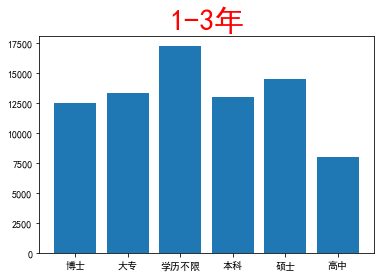

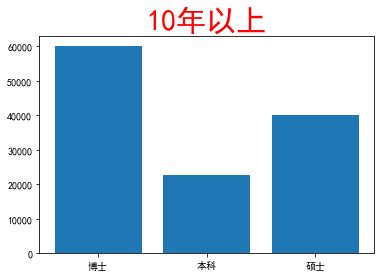

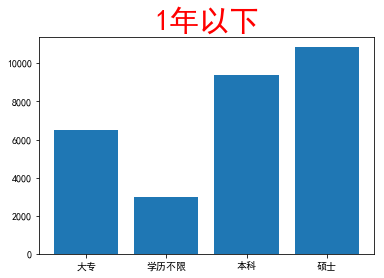

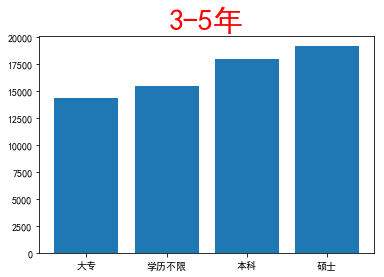

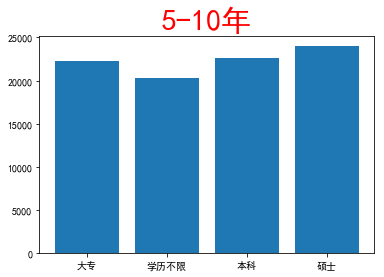

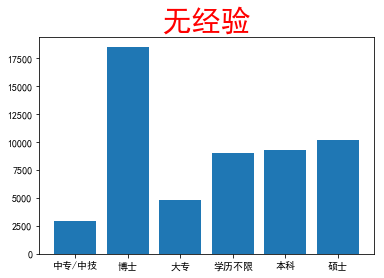

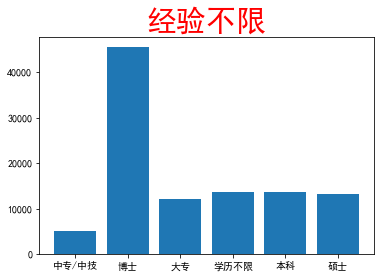

In [15]:
# 不同工作经验下不同学历对薪资的影响
dw_ = {}
for i in data.groupby('worktime'):
    de_ = {}
    for j in i[1].groupby('education')['salary']:
        s = 0
        for k in j[1]:
            s += k
        a = round(s / len(j[1]), 2)
        de_[j[0]] = a
    dw_[i[0]] = de_
i = 0
for kw, vw in dw_.items():
    kwe_ = []
    vwe_ = []
    for kwe, vwe in vw.items():
        kwe_.append(kwe)
        vwe_.append(vwe)
    plt.figure(figsize=(6, 4))
    plt.title(kw,size=30,color='r')
    plt.bar(kwe_, vwe_)
    plt.show()

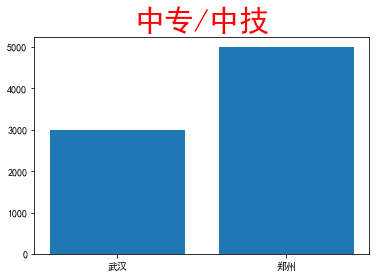

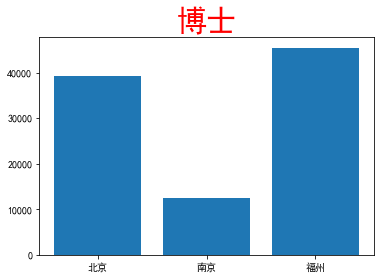

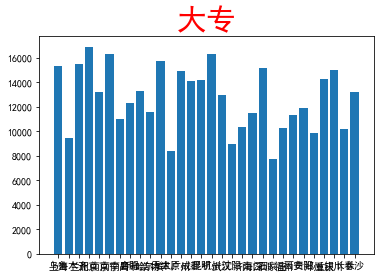

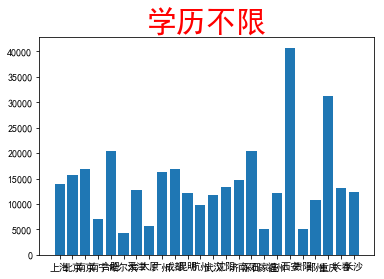

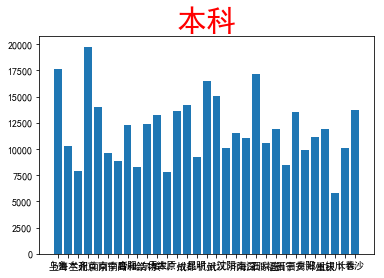

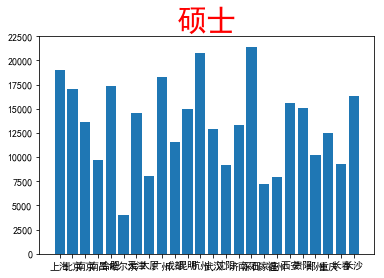

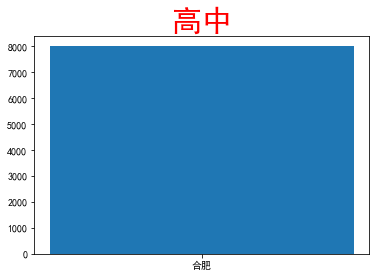

In [16]:
# 不同城市下不同学历对薪资的影响
import math
dw_ = {}
for i in data.groupby('education'):
    de_ = {}
    for j in i[1].groupby('city')['salary']:
        s = 0
        for k in j[1]:
            s += k
        a = round(s / len(j[1]), 2)
        de_[j[0]] = a
    dw_[i[0]] = de_
i = 0
for kw, vw in dw_.items():
    kwe_ = []
    vwe_ = []
    for kwe, vwe in vw.items():
        kwe_.append(kwe)
        vwe_.append(vwe)
    plt.figure(figsize=(6, 4))
    plt.title(kw,size=30,color='r')
    plt.bar(kwe_, vwe_)
    plt.show()

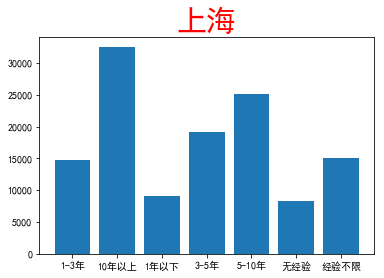

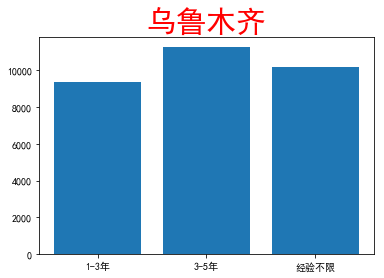

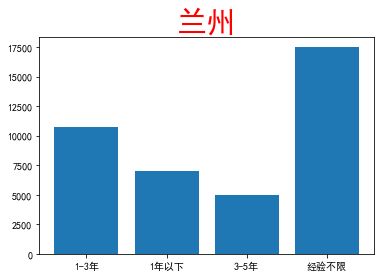

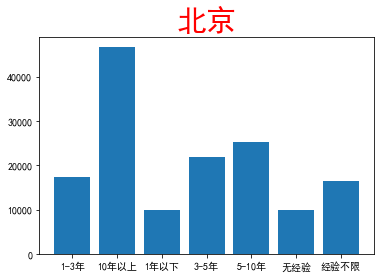

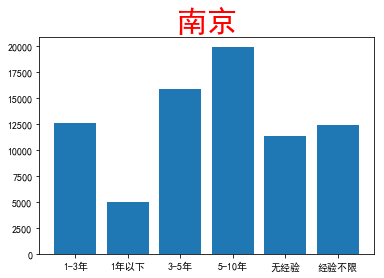

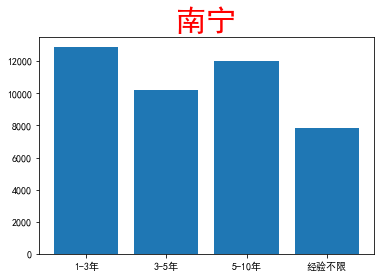

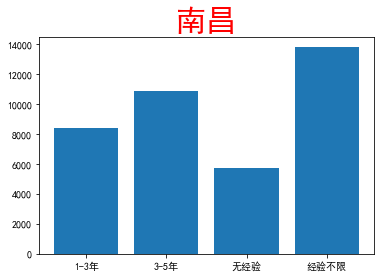

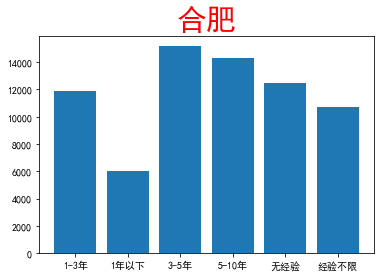

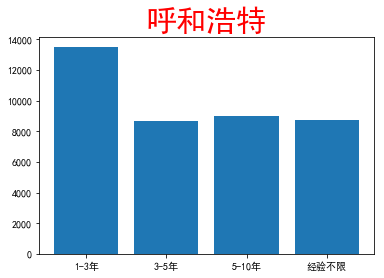

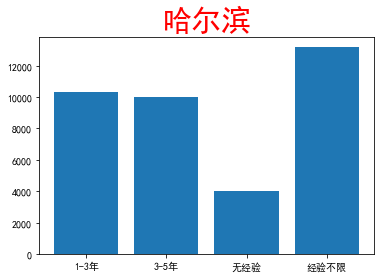

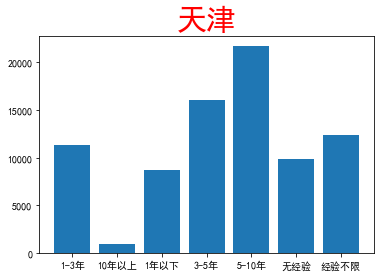

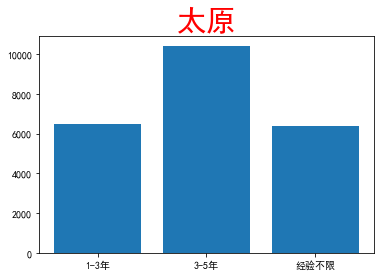

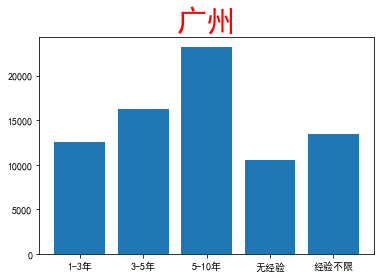

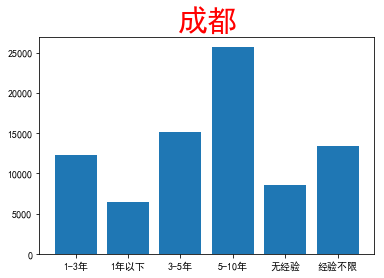

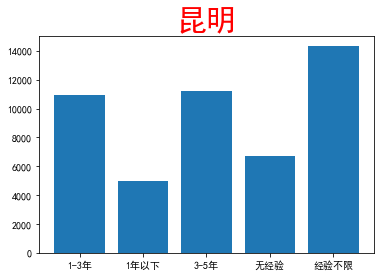

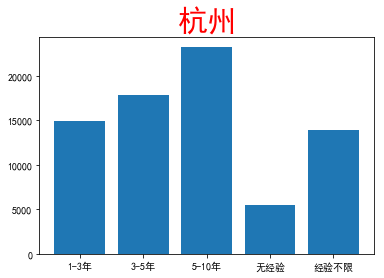

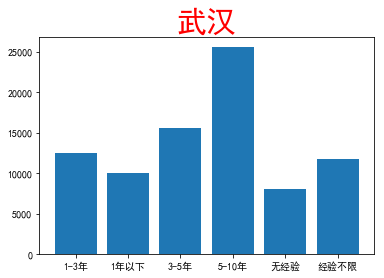

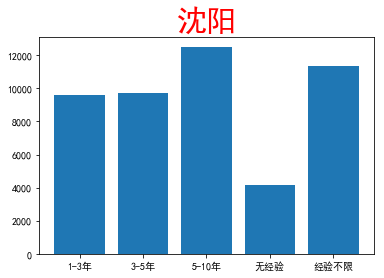

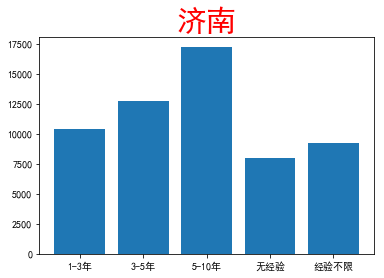

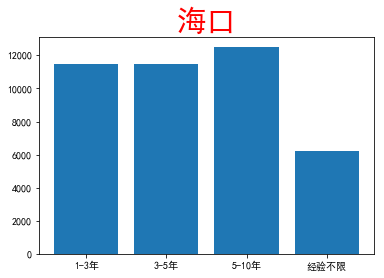

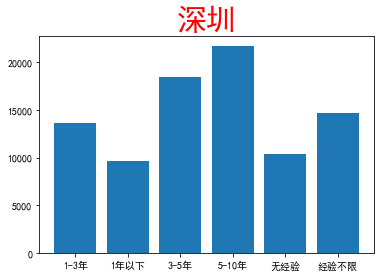

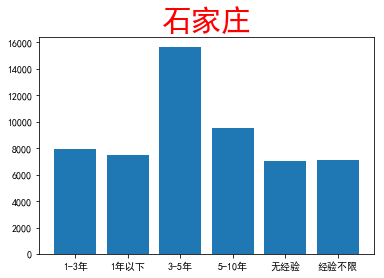

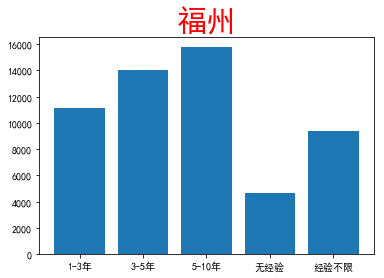

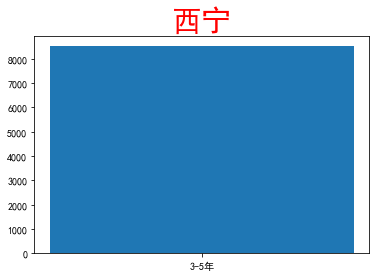

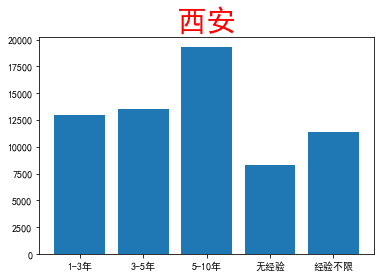

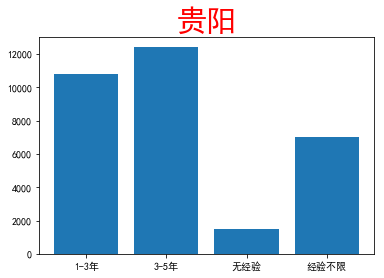

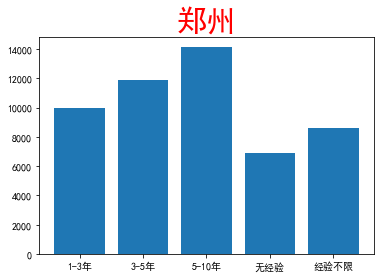

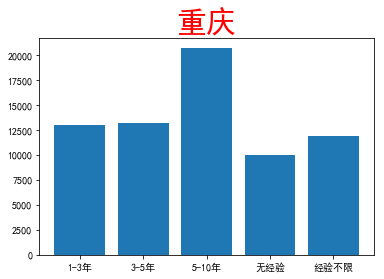

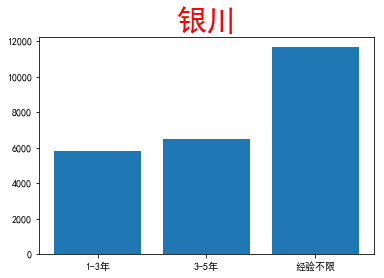

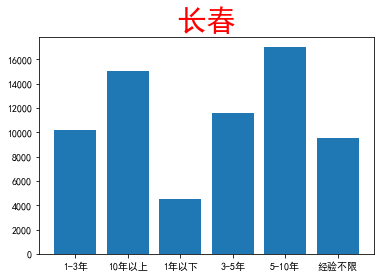

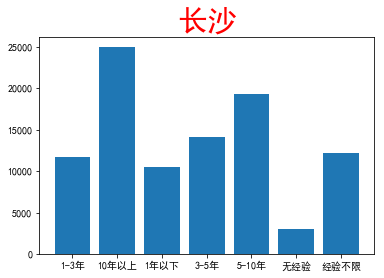

In [17]:
# 不同工作经验下不同城市对薪资的影响
dw_ = {}
for i in data.groupby('city'):
    de_ = {}
    for j in i[1].groupby('worktime')['salary']:
        s = 0
        for k in j[1]:
            s += k
        a = round(s / len(j[1]), 2)
        de_[j[0]] = a
    dw_[i[0]] = de_
i = 0
for kw, vw in dw_.items():
    kwe_ = []
    vwe_ = []
    for kwe, vwe in vw.items():
        kwe_.append(kwe)
        vwe_.append(vwe)
    plt.figure(figsize=(6, 4))
    plt.title(kw,size=30,color='r')
    plt.bar(kwe_, vwe_)
    plt.show()

In [18]:
db = ''
for d in data['describ']:
    ds = ''.join(d)
    db += ds
db = db.replace(' ','')
print(db.count('岗位'))

4469


In [22]:
seg_list = jieba.cut(db)
 # 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('stop.txt', encoding='utf-8').readlines()]
    return stopwords
stopwords = stopwordslist()
outstr = ''
count_ = 0
co = 0
for word in seg_list:
    co += 1
    if word not in stopwords:
        count_ += 1
        if word != '\t':
            if len(word) > 1:
                if word.isalpha():
                    word = word.capitalize()
            outstr += word
            outstr += " "          
seg_list2 = jieba.cut(outstr)
l = list(seg_list2)
ds_ = {}
for i in set(l):
    if len(i) > 1:
        if i.isalpha():
            i = i.capitalize()
        ds_[i] = l.count(i)
for x, w in anls.extract_tags(outstr, topK=10, withWeight=True):
        print('%s %s' % (x, w))

Python 0.4378705891414683
Linux 0.1916225746539891
数据库 0.15681165761396043
Mysql 0.12005591172195627
算法 0.11758745012436117
框架 0.10041412265358546
Hadoop 0.08450602230651033
Shell 0.08183811315713353
Sql 0.08123783359852375
Web 0.07930359946522557


In [23]:
sorted(ds_, key=ds_.get, reverse=True)

['Python',
 '数据库',
 'Linux',
 '框架',
 '算法',
 'Mysql',
 'Hadoop',
 'Shell',
 'Sql',
 'Web',
 'Spark',
 '爬虫',
 '东路',
 'Redis',
 'Hive',
 'Oracle',
 '数据结构',
 '部署',
 'Javascript',
 'Hbase',
 '架构设计',
 'Django',
 'Etl',
 'Css',
 'Mongodb',
 'Kafka',
 'Http',
 'Flask',
 'Tcp',
 '多线程',
 'Scala',
 '发放',
 'Html',
 'Docker',
 'Js',
 'Git',
 '黄埔区',
 '服务器',
 '新城',
 '国外',
 '香雪',
 '沙东',
 '洛溪',
 '奥园',
 '海珠区',
 '88',
 '二楼',
 '三楼',
 '自编',
 '公园',
 '咨询',
 'Ajax',
 'Perl',
 'HTML5',
 '设计模式',
 'Storm',
 '计算机专业',
 '童程',
 '童美',
 '底薪',
 'Unix',
 'Sqlserver',
 'Xml',
 '规定',
 '期权',
 'Nosql',
 '分红',
 '容器',
 '新港',
 '股票',
 '产假',
 '拓展',
 'Net',
 'Json',
 'Postgresql',
 '亲和力',
 '聚餐',
 'Tornado',
 '礼品',
 '下午茶',
 '病假',
 '区块',
 'Ai',
 'Nginx',
 'Windows',
 'Elasticsearch',
 '单元测试',
 '布局',
 'Flink',
 '备课',
 '壬丰',
 '缓存',
 '丧假',
 'Devops',
 'Hdfs',
 '优秀员工',
 '提成',
 'Tensorflow',
 'Openstack',
 'Vue',
 '礼金',
 '分布',
 '酒店',
 '课堂',
 '户外',
 '不定期',
 '调动',
 '就近',
 'Bi',
 '公交',
 '广东省',
 '即到',
 '气氛',
 '顺利进行',
 '天年',
 '队列',
 '111',
 